# Response specturm using central difference method
By [Tadesse G. Wakjira](https://www.linkedin.com/in/tadessewakjira/)

In [1]:
# Import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the ground accelaration data
data = pd.read_excel('Trinidad.xlsx','data')
# data = pd.read_excel('Trinidad.xlsx','data')
t = data.iloc[:,0]
acc = data.iloc[:,1]
g = 9.81 # in m/s2

## Ground Acceleration

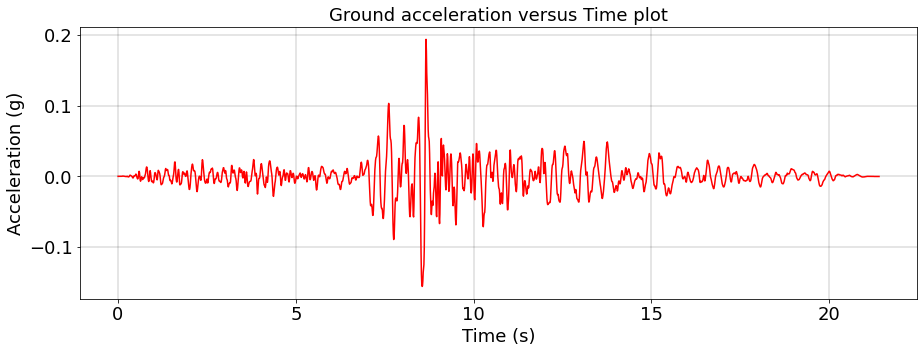

In [3]:
#-----plot setup
plt.figure(figsize=(15,5))  # plot size
fontsz = 18

# font size
plt.rcParams['font.size'] = '18'  # font size of axis label

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR




plt.plot(t, acc/g, 'r')

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
# plt.ylabel('Acceleration ' r'$(m/{s^2})$', fontsize = fontsz)
plt.ylabel('Acceleration (g)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Ground acceleration versus Time plot', fontsize=fontsz)
plt.show();

## Response Time-Histories

In [4]:
def calc2 ():
    p_bar = []
    u = []
    du = []
    ddu = []

    # u.append(u_00)
    u.append(u_0)
    du.append(du_0)
    ddu.append(ddu_0)

    p_bar0 = -m*data.iloc[0,0]-(m/h/h-c/2/h)*u_00-(k-2*m/h/h)*u_0
    p_bar.append(p_bar0)
    # u.append(p_bar[0]/k_bar)

    for i in range (1, data.shape[0]):
        ddug = data.iloc[i,1] # ground accelaration in m/s2
        u.append(np.real(p_bar[i-1]/k_bar))
        p_bar.append(np.real(-m*ddug-(m/h/h-c/2/h)*u[i-1]-(k-2*m/h/h)*u[i]))

    #     du.append(-m*ddug-(m/h/h-c/2/h)*u[i-1]-(k-2*m/h/h)*du)
    u.append(p_bar[data.shape[0]-1]/k_bar) # last displacement

    for i in range (1, data.shape[0]):
        du.append((u[i+1]-u[i-1])/2/h)  # velocity (central difference method)
        
        ddug = data.iloc[i,1] # ground accelaration in m/s2
        acceleration = (u[i+1]-2*u[i]+u[i-1])/h/h ; # acceleration (central difference method)
        ddu.append(acceleration + ddug)  # total acceleration
        
        
        
    combined = []
    combined.append(u[0:len(t)])
    combined.append(du)
    combined.append(ddu)

    combined_pd1 = pd.DataFrame(combined).T

    col = ["Displacement", "Velocity","Acceleration"]
    combined_pd = pd.DataFrame(data=combined_pd1.values, columns=col)

    combined_pd
    return combined_pd

In [5]:
h = t[1]-t[0]

In [6]:
u_00 = 0.0
u_0 = 0.0
du_0 = 0.0
ddu_0 = 0.0
t_0 = 0.0

In [7]:
# Input parameters
ζ = 0.05 # damping ratio
# Assumptions
T = 0.2
m = 1 # mass in kg
omega = 2*np.pi/T # Circular frequency in rad/sec
k = m*omega**2
c = 2*m*omega*ζ # Damping coefficient in kg/s
    
k_bar = m/h/h + c/2/h
p_bar0 = -m*data.iloc[0,0]-(m/h/h-c/2/h)*u_00-(k-2*m/h/h)*u_0

In [8]:
result = calc2()
disp = result.iloc[:,0]
vel = result.iloc[:,1]
acce = result.iloc[:,2]

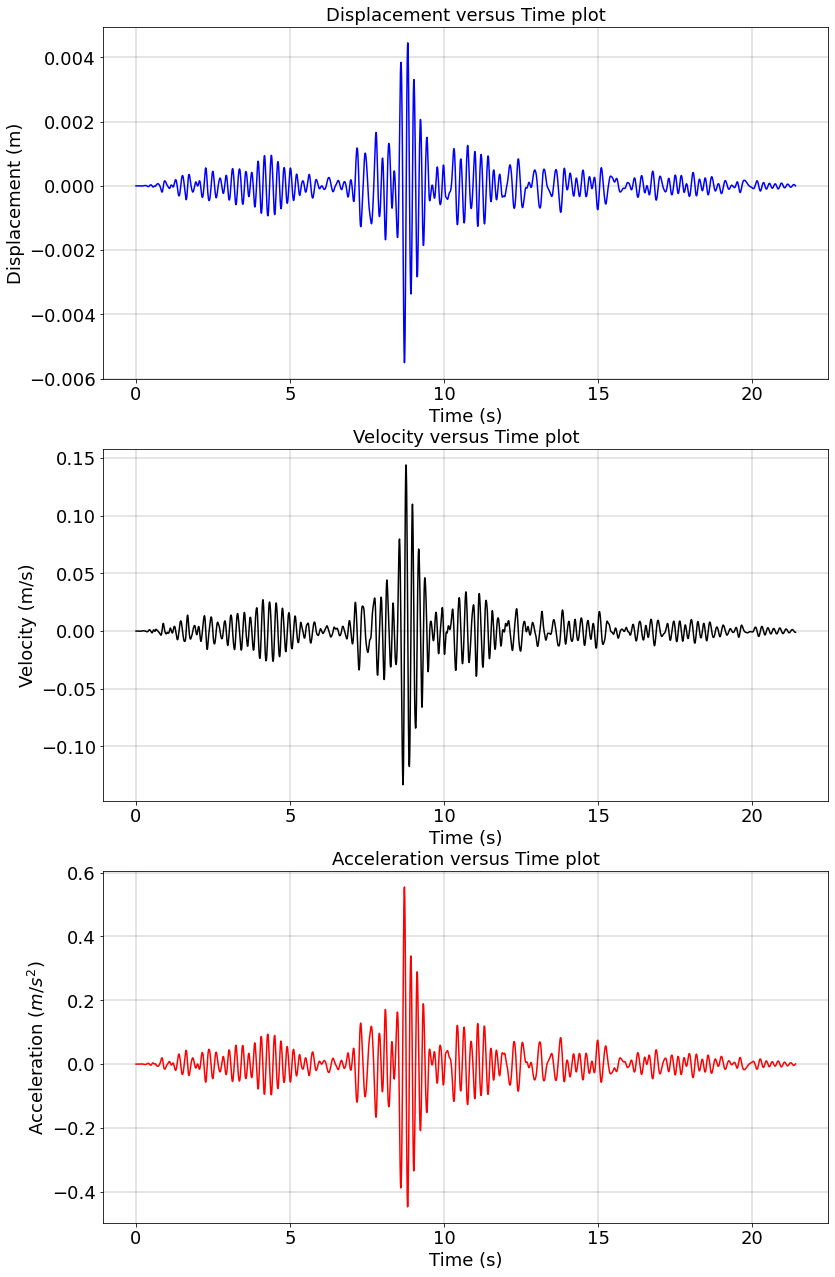

In [9]:
#-----plot setup
plt.figure(figsize=(13,22))  # plot size
fontsz = 18

# --------------- Displacement versus time -------------------------
plt.subplot(3, 1, 1)
plt.plot(t, disp[0:len(t)], 'b')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Displacement (m)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Displacement versus Time plot', fontsize=fontsz)


# ----------- Velocity versus time ----------------------
plt.subplot(3, 1, 2)
plt.plot(t, vel, 'k')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Velocity (m/s)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Velocity versus Time plot', fontsize=fontsz)

#----------- Acceleration versus time----------------------
plt.subplot(3, 1, 3)
plt.plot(t, acce/g, 'r')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Acceleration ' r'$(m/{s^2})$', fontsize = fontsz)
# plt.ylabel('Acceleration (g)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Acceleration versus Time plot', fontsize=fontsz)

plt.show();

# Response Spectrum

## Single damping coefficient

In [10]:
# Input parameters
ζ = 0.05 # damping ratio
# Assumptions
period = []
res2 = []
m = 1 # mass in kg
for k in range (5, 400):
    T = k/100
    omega = 2*np.pi/T # Circular frequency in rad/sec
    k = m*omega**2
    c = 2*m*omega*ζ # Damping coefficient in kg/s
    period.append(T)
    k_bar = m/h/h + c/2/h
    p_bar0 = -m*data.iloc[0,0]-(m/h/h-c/2/h)*u_00-(k-2*m/h/h)*u_0
    res2.append(calc2())  
    

In [11]:
max_disp = []
max_vel = []
max_acce = [data.iloc[:,1].max()]
for j in range (1, len(res2)):
    max_disp.append(np.max(np.abs(res2[j].iloc[:,0])))
    max_vel.append(np.max(np.abs(res2[j].iloc[:,1])))
    max_acce.append(np.max(np.abs(res2[j].iloc[:,2])))

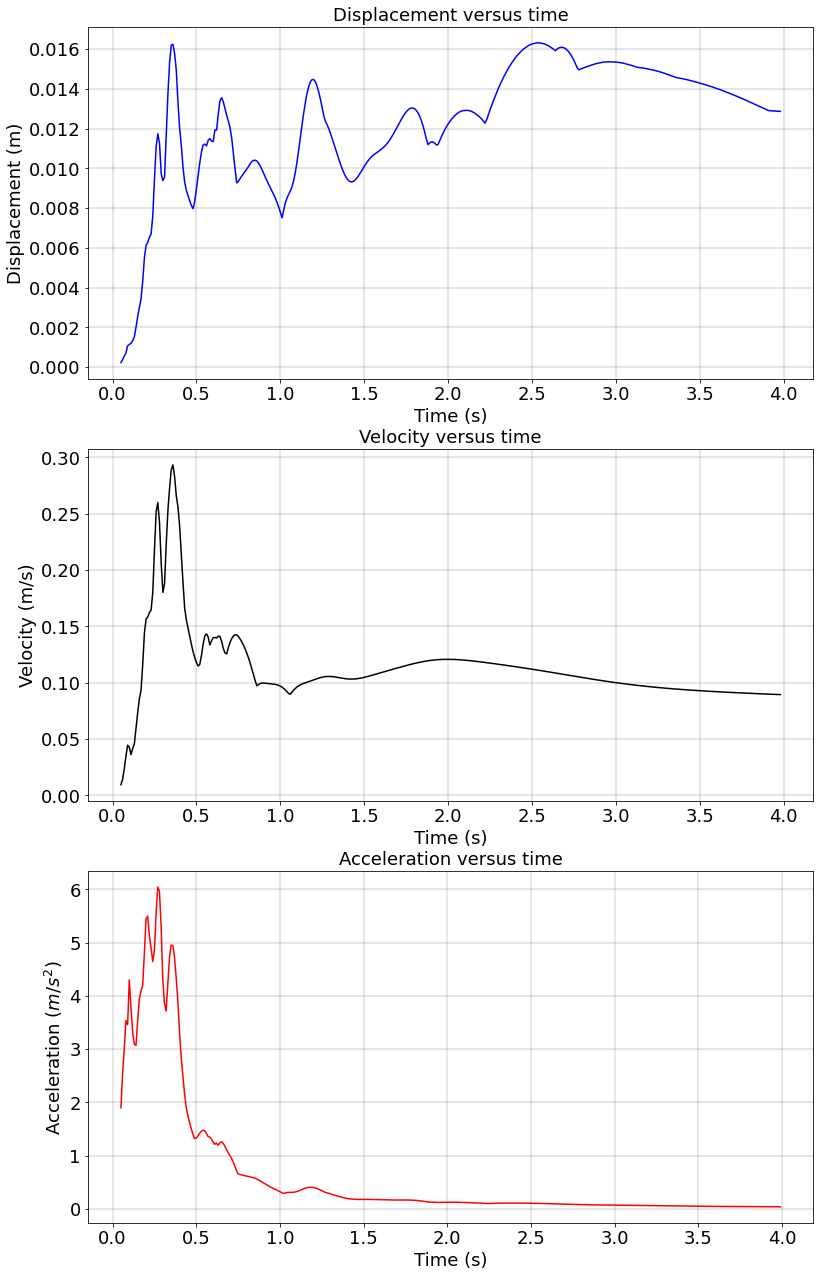

In [12]:
#-----plot setup
plt.figure(figsize=(13,22))  # plot size
fontsz = 18

# ----------- Displacement versus time ----------------------
plt.subplot(3, 1, 1)
plt.plot(period[0:len(max_disp)], max_disp, 'b')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Displacement (m)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Displacement versus time', fontsize=fontsz)

# ----------- Velocity versus time ----------------------
plt.subplot(3, 1, 2)
plt.plot(period[0:len(max_vel)], max_vel, 'k')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Velocity (m/s)', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Velocity versus time', fontsize=fontsz)

#----------- Acceleration versus time----------------------
plt.subplot(3, 1, 3)
plt.plot(period[0:len(max_acce)], max_acce, 'r')

# change axis limit
axes = plt.gca()
# axes.set_xlim([0, lm1])
# axes.set_ylim([-3, 4])

plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

plt.xlabel('Time (s)', fontsize = fontsz)
plt.ylabel('Acceleration ' r'$(m/{s^2})$', fontsize = fontsz)
# plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Acceleration versus time', fontsize=fontsz)

plt.show();

## Multiple damping ciefficients

<b> Damping coefficients

In [16]:
ζ1 = np.array([0.025, 0.05, 0.075, 0.10, 0.125, 0.15]) # input damping ratios

<b> Function to calculate maximum response at different periods

In [17]:
max_disp = []
max_acc = []
max_vel = []
for d in range (1, len(ζ1)+1):
    # Assumptions
    period = []
    res2 = []
    m = 1 # mass in kg
    ζ = ζ1[d-1]
    for k in range (5, 400):
        T = k/100
        omega = 2*np.pi/T # Circular frequency in rad/sec
        k = m*omega**2
        c = 2*m*omega*ζ # Damping coefficient in kg/s
        period.append(T)
        k_bar = m/h/h + c/2/h
        p_bar0 = -m*data.iloc[0,0]-(m/h/h-c/2/h)*u_00-(k-2*m/h/h)*u_0
        res2.append(calc2())
    
    max_disp1 = []
    max_vel1 = []
    max_acc1 = []

    for j in range(1, len(res2)):
        max_disp1.append(np.max(np.abs(res2[j].iloc[:,0])))
        max_vel1.append(np.max(np.abs(res2[j].iloc[:,1])))
        max_acc1.append(np.max(np.abs(res2[j].iloc[:,2])))
        
    max_disp1_pd = pd.DataFrame(max_disp1)
    max_vel1_pd = pd.DataFrame(max_vel1)
    max_acc1_pd = pd.DataFrame(max_acc1)
    
    max_disp.append(max_disp1_pd)
    max_vel.append(max_vel1_pd)
    max_acc.append(max_acc1_pd)

<b> Plot the responses

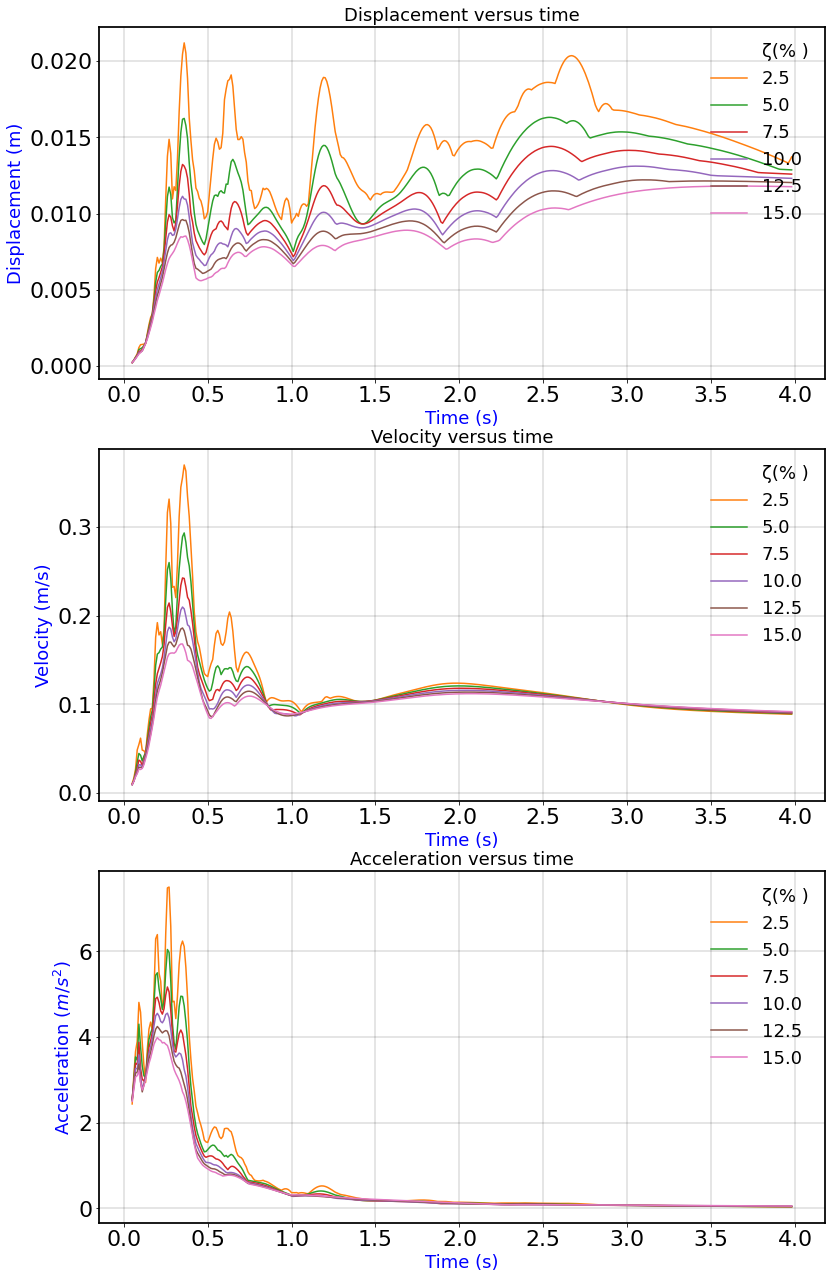

In [20]:
#-----plot setup
plt.figure(figsize=(13,22))  # plot size
fontsz = 18

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
# font style
# matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['font.style'] = 'italic'

plt.rcParams['axes.linewidth'] = 1.75; # set the value globally
axes_style = {'linewidth':7.5};
plt.rcParams['font.size'] = '22'  # font size of axis label

legn = []
for b in range (1, len(ζ1)+1):
    legn.append(ζ1[b-1]*100)

# ----------- Displacement versus time ----------------------
# colors = ['r', 'b', 'k', 'g']
plt.subplot(3, 1, 1)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    
    plt.plot(period[0:len(max_disp[a-1])], max_disp[a-1], label=legn[a-1])
    
    
    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Displacement (m)', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Displacement versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

# ----------- Velocity versus time ----------------------
plt.subplot(3, 1, 2)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    plt.plot(period[0:len(max_vel[a-1])], max_vel[a-1], label=legn[a-1]) 

    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Velocity (m/s)', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Velocity versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

#----------- Acceleration versus time----------------------
plt.subplot(3, 1, 3)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    plt.plot(period[0:len(max_acc[a-1])], max_acc[a-1], label=legn[a-1]) 

    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Acceleration ' r'$(m/{s^2})$', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Acceleration versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

plt.show();

In [23]:
ζ1 = np.array([0.05, 0.10]) # input damping ratios

In [24]:
max_disp = []
max_acc = []
max_vel = []
for d in range (1, len(ζ1)+1):
    # Assumptions
    period = []
    res2 = []
    m = 1 # mass in kg
    ζ = ζ1[d-1]
    for k in range (5, 400):
        T = k/100
        omega = 2*np.pi/T # Circular frequency in rad/sec
        k = m*omega**2
        c = 2*m*omega*ζ # Damping coefficient in kg/s
        period.append(T)
        k_bar = m/h/h + c/2/h
        p_bar0 = -m*data.iloc[0,0]-(m/h/h-c/2/h)*u_00-(k-2*m/h/h)*u_0
        res2.append(calc2())
    
    max_disp1 = []
    max_vel1 = []
    max_acc1 = []

    for j in range(1, len(res2)):
        max_disp1.append(np.max(np.abs(res2[j].iloc[:,0])))
        max_vel1.append(np.max(np.abs(res2[j].iloc[:,1])))
        max_acc1.append(np.max(np.abs(res2[j].iloc[:,2])))
        
    max_disp1_pd = pd.DataFrame(max_disp1)
    max_vel1_pd = pd.DataFrame(max_vel1)
    max_acc1_pd = pd.DataFrame(max_acc1)
    
    max_disp.append(max_disp1_pd)
    max_vel.append(max_vel1_pd)
    max_acc.append(max_acc1_pd)

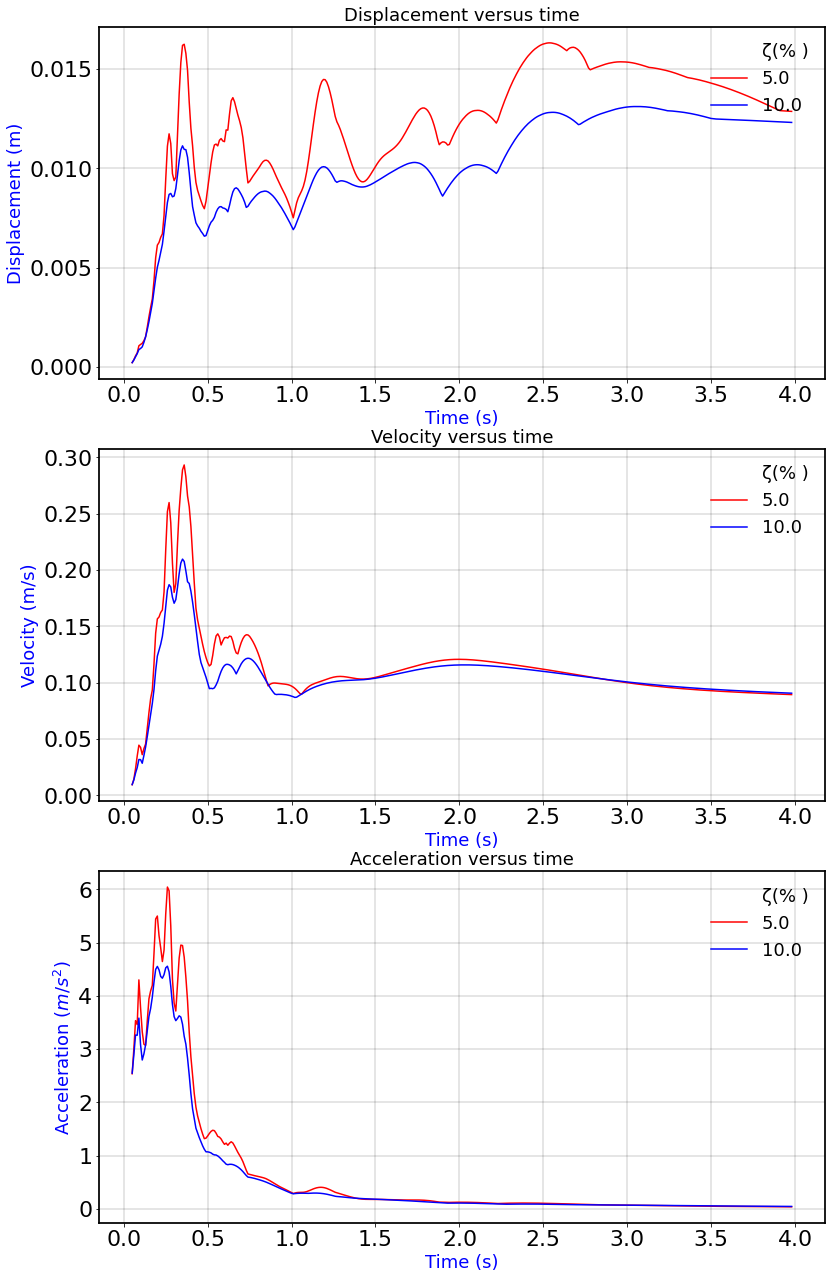

In [28]:
#-----plot setup
plt.figure(figsize=(13,22))  # plot size
fontsz = 18

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
# font style
# matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['font.style'] = 'italic'

plt.rcParams['axes.linewidth'] = 1.75; # set the value globally
axes_style = {'linewidth':7.5};
plt.rcParams['font.size'] = '22'  # font size of axis label

legn = []
for b in range (1, len(ζ1)+1):
    legn.append(ζ1[b-1]*100)

# ----------- Displacement versus time ----------------------
colors = ['r', 'b', 'k', 'g']
plt.subplot(3, 1, 1)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    
    plt.plot(period[0:len(max_disp[a-1])], max_disp[a-1], colors[a-1], label=legn[a-1])
    
    
    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Displacement (m)', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Displacement versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

# ----------- Velocity versus time ----------------------
plt.subplot(3, 1, 2)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    plt.plot(period[0:len(max_vel[a-1])], max_vel[a-1], colors[a-1], label=legn[a-1]) 

    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Velocity (m/s)', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Velocity versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

#----------- Acceleration versus time----------------------
plt.subplot(3, 1, 3)
plt.plot([], [], ' ', label="ζ(% )") # extra legend
for a in range (1, len(ζ1)+1):
    plt.plot(period[0:len(max_acc[a-1])], max_acc[a-1], colors[a-1], label=legn[a-1]) 

    # change axis limit
    axes = plt.gca()
    # axes.set_xlim([0, lm1])
    # axes.set_ylim([-3, 4])

    plt.grid(b=True, which='major', axis='both', color='k', linestyle='-', linewidth=0.2)
    plt.grid(b=True, which='minor', axis='both', color='r', linestyle='--', linewidth=0.2)

    plt.xlabel('Time (s)', fontsize=fontsz, color='b')
    plt.ylabel('Acceleration ' r'$(m/{s^2})$', fontsize=fontsz, color='b')
    # plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
    plt.title('Acceleration versus time', fontsize=fontsz)
    plt.legend(loc="upper right", fontsize=fontsz,frameon=False)

plt.show();